# Chapter 4 - Linear Neural Networks for Classification

## 4.1. Softmax Regression

### 4.1.1. Classification

Suppose a simple image classification problem. Each input consists of a $2\times 2$ grayscale image, where each pixel value is represented with a single scalar: $x_1, x_2, x_3, x_4$. Also assume that each image belongs to one among the categories "cat", "chicken", and "dog".

A natural way to *store labels* is to use $y \in \{1, 2, 3\}$ to represent $\{\textrm{dog}, \textrm{cat}, \textrm{chicken}\}$. In general, a simple way to represent categorical data is the *one-hot encoding*. Therefore, $y \in \{1, 2, 3\}$ becomes
\begin{split}
y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}
\end{split}

#### 4.1.1.1. Linear Model

In order to estimate the conditional probabilities associated with all the possible classes, we need a model with multiple outputs, one per class.

Since we have 4 features and 3 possible output categories, we need 12 scalars to represent the weights and 3 scalars to represent the biases:
\begin{split}
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3
\end{aligned}
\end{split}

The corresponding neural network diagram is shown below:

![](..\imgs\ch04\softmaxreg.svg)

The output layer is a *fully connected layer*. This can also be represented with vectors and matrices: $\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$, where $\mathbf{W}$ is a $3\times 4$ matrix and $\mathbf{b} \in \mathbb{R}^3$.

#### 4.1.1.2. The Softmax

The goals for outputs $o_i$,
* the outputs $o_i$ sum up to 1 in the way the probabilities behave
* the outputs $o_i$ are nonnegative

To achieve the goals, we can use an exponential function $P(y = i) \propto \exp o_i$. This satisfy the requirement that the conditional class probability increases with increasing $o_i$, it is monotonic, and all probabilities are nonnegative. They add up to 1 by dividing each by their sum, which is *normalization*.

The *softmax* function is putting the above two pieces together:
\begin{split}
\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \textrm{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}
\end{split}

The **largest coordinate** of $\mathbf{o}$ corresponds to the most likely class according to $\hat{\mathbf{y}}$. Because the softmax operation preserves the ordering among its arguments,
\begin{split}
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j
\end{split}

#### 4.1.1.3. Vectorization

Assume given a minibatch $\mathbf{X} \in \mathbb{R}^{n \times d}$ of $n$ examples with dimensionality (number of inputs) $d$. Also assume that there are $q$ categories in the output. Then the weights satisfy $\mathbf{W} \in \mathbb{R}^{d \times q}$ and the bias satisfies $\mathbf{b} \in \mathbb{R}^{1\times q}$:
\begin{split}
\begin{aligned} 
\mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}) 
\end{aligned}
\end{split}
Since each row in $\mathbf{X}$ represents a data example, the softmax operation itself can be computed *rowwise*: for each row of $\mathbf{O}$, exponentiate all entries and then normalize them by the sum.

### 4.1.2. Loss Function

#### 4.1.2.1. Log-Likelihood

The output vectors $\hat{\mathbf{y}}$ of softmax function can be interpret as the (estimated) conditional probabilities of each class, given any input $\mathbf{x}$, such as $\hat{y}_1=P(y=\textrm{cat} \mid \mathbf{x})$.

Assume that for a dataset with features $\mathbf{X}$, the labels $\mathbf{Y}$ are represented with a one-hot encoding label vector. We can compare the estimates with reality by checking how probable the actual classes are according to our model, given the features:
\begin{split}
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
\end{split}
where the factorization is allowed here since we assume that each label is drawn independently from its respective distribution $P(\mathbf{y}\mid\mathbf{x}^{(i)})$.

Equivalently, this is the same as minimizing the negative log-likelihood:
\begin{split}
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)})
\end{split}
where for any pair of label $\mathbf{y}$ and model prediction $\hat{\mathbf{y}}$ over $q$ classes, the loss function $l$ is
\begin{split}
l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j
\end{split}

This loss function is called the *cross-entropy loss*. Since $\mathbf{y}$ is a one-hot vector of length $q$, the sum over all its coordinates $j$ vanishes for all but one term releated to the true category.

The loss $l(\mathbf{y}, \hat{\mathbf{y}})$ is bounded from below by 0 whenever $\hat{\mathbf{y}}$ is a probability vector.

#### 4.1.2.2. Softmax and Cross-Entropy Loss

If we substitute the softmax function into the cross-entropy loss function:
\begin{split}
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j \\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j
\end{aligned}
\end{split}

Consider the derivative with respect to any logit $o_j$,
\begin{split}
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j
\end{split}
In other words, the derivative is the difference between the probability assigned by our model, as expressed by the softmax operation, and what actually happened, as expressed by elements in the one-hot label vector.

This is similar to the regression: the gradient was the difference between the observation $y$ and estimate $\hat{y}$.

### 4.1.3. Information Theory Basics

#### 4.1.3.1. Entropy

For a distribution $P$, its *entropy*, $H[P]$, is defined as:
\begin{split}
H[P] = \sum_j - P(j) \log P(j)
\end{split}
which states that in order to encode data drawn randomly from the distribution $P$, we need at least $H[P]$ "nats" to encode it. One "nat" is $\frac{1}{\log(2)} \approx 1.44$ bit.

#### 4.1.3.2. Surprisal

Claude Shannon settled on $\log \frac{1}{P(j)} = -\log P(j)$ to quantify one's *surprisal* at observing an event $j$ having assigned it a (subjective) probability $P(j)$. The entropy is then the *expected surprisal* when one assigned the correct probabilities that truly match the data-generating process.

#### 4.1.3.3. Cross-Entropy Revisited

The cross-entropy *from P to Q*, $H(P, Q)$, is the expected surprisal of an observer with subjective probabilities $Q$ upon seeing data that was actually generated according to probabilities $P$.

This is given by $H(P, Q) \stackrel{\textrm{def}}{=} \sum_j - P(j) \log Q(j)$. The lowest possible cross-entropy is achieved when $P=Q$. In this case, the cross-entropy from $P$ to $Q$ is $H(P, P)= H(P)$.

## 4.2. The Image Classification Dataset

In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms

from d2l import torch as d2l

# Use SVG format to display plot in jupyter
d2l.use_svg_display()

### 4.2.1. Loading the Dataset

Fashion-MNIST consists of images from 10 categories, each represented by 6000 images in the training dataset and by 1000 in the test dataset.

In [2]:
class FashionMNIST(d2l.DataModule):
    '''The Fashion-MNIST dataset'''
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([
            transforms.Resize(resize), # resize the image to resize
            transforms.ToTensor() # convert to tensor
        ])

        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, # root directory where dataset exists
            train=True, # training set
            transform=trans, # apply transform
            download=True # download if not exists
        )
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root,
            train=False, # validation set
            transform=trans,
            download=True
        )

In [3]:
# read data
data = FashionMNIST(batch_size=256, resize=(32, 32))
len(data.train), len(data.val)

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



(60000, 10000)

In [4]:
# the image is saved as a 3D tensor of shape (channel, height, width)
data.train[0][0].shape

torch.Size([1, 32, 32])

In [5]:
# Convert labels
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    '''Return text labels'''
    labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

In [6]:
# use a built-in dataloader to read a minibatch of data with size batch_size
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    
    dataloader = torch.utils.data.DataLoader(
        data, # dataset
        self.batch_size, # batch size
        shuffle=train, # shuffle if training
        num_workers=self.num_workers # number of subprocesses for data loading
    )
    return dataloader

In [7]:
# read a minibatch of data
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([256, 1, 32, 32]) torch.float32 torch.Size([256]) torch.int64


In [8]:
# check the time to read the entire dataset
tic = time.time()
for X, y in data.train_dataloader():
    continue
print(f'{time.time() - tic:.2f} sec')

5.50 sec


### 4.2.3. Visualization

In [9]:
# There is a function show_images in d2l to display images
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    '''Plot a list of images'''
    return NotImplemented

In [10]:
# we can use the function to display the first few images
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)

    # display images
    d2l.show_images(
        X.squeeze(1), # remove channel dimension
        nrows, ncols, # number of rows and columns
        titles=labels # labels
    )

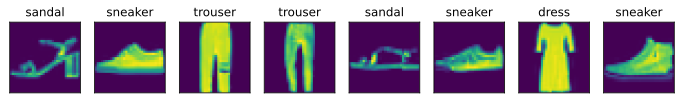

In [11]:
batch = next(iter(data.train_dataloader()))
data.visualize(batch)

## 4.3. The Base Classification Model